In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)


In [13]:
from glob import glob

In [14]:
tsvs = glob('./PT*/*/metric_performance.tsv')

In [15]:
res = []
for tsv in tsvs:
    df = pd.read_csv(tsv, sep='\t', index_col = 0)
    _, mode, seed, _ = tsv.split('/')
    df['mode'] = mode
    df['seed'] = seed
    res.append(df)

In [16]:
c = sns.palettes.color_palette('rainbow', 2, desat = 1).as_hex()
c

['#2bdddd', '#d4dd80']

In [17]:
df = pd.concat(res)
df

,train_cohort,test_cohort,ROC,PRC,F1,ACC,MCC,mode,seed
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.660870,0.494901,0.500000,0.575758,0.204656,PT(10K)-LFT(69),24
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.743478,0.711864,0.560000,0.666667,0.325042,PT(10K)-LFT(69),42
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.791304,0.706613,0.580645,0.606061,0.361372,PT(10K)-LFT(69),64
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),24
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),42
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),64
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.847826,0.837587,0.700000,0.818182,0.569565,PT(10K)-PFT(1031),24
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.843478,0.833021,0.750000,0.878788,0.714920,PT(10K)-PFT(1031),42
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.873913,0.880713,0.750000,0.878788,0.714920,PT(10K)-PFT(1031),64
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.847826,0.837587,0.736842,0.848485,0.632599,PT(10K)-PFT(1031)-LFT(69),24


Text(0, 0.5, 'ACC')

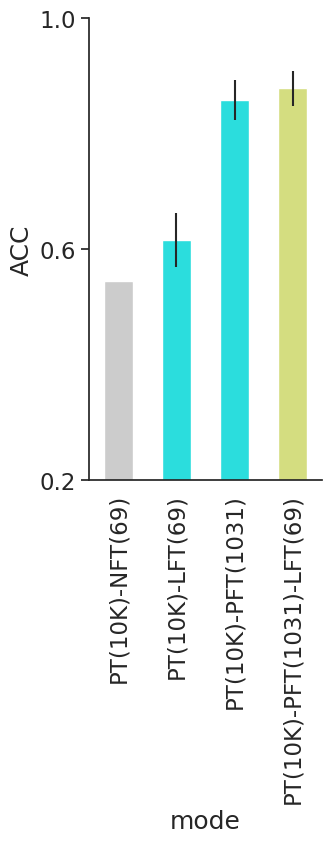

In [18]:
metric = 'ACC'

mean = df.groupby('mode')[metric].mean()
std = df.groupby('mode')[metric].std()

order = mean.sort_values().index

mean = mean.loc[order]
std = std.loc[order]

ot = '#cccccc'
color_dict = {'PT(10K)-NFT(69)':ot, 'PT(10K)-LFT(69)':c[0], 'PT(10K)-PFT(1031)':c[0], 'PT(10K)-PFT(1031)-LFT(69)':c[1]}
colors = pd.Series(color_dict).loc[order].tolist()


fig, ax = plt.subplots(figsize=(3,6))
mean.plot(kind = 'bar', legend=False, ax=ax, yerr = std, color = colors) 

ax.set_ylim(0.2,1)
ax.set_yticks([0.2, 0.6, 1.0])
ax.xaxis.set_label_position('bottom')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(metric)

Text(0, 0.5, 'ROC')

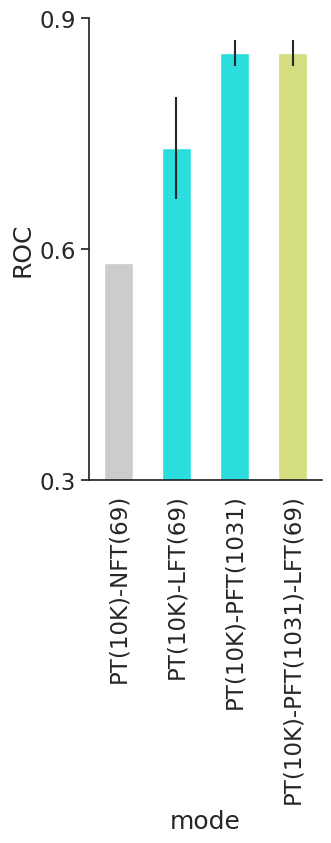

In [19]:
metric = 'ROC'

mean = df.groupby('mode')[metric].mean()
std = df.groupby('mode')[metric].std()

mean = mean.loc[order]
std = std.loc[order]

ot = '#cccccc'
color_dict = {'PT(10K)-NFT(69)':ot, 'PT(10K)-LFT(69)':c[0], 'PT(10K)-PFT(1031)':c[0], 'PT(10K)-PFT(1031)-LFT(69)':c[1]}
colors = pd.Series(color_dict).loc[order].tolist()


fig, ax = plt.subplots(figsize=(3,6))
mean.plot(kind = 'bar', legend=False, ax=ax, yerr = std, color = colors) 

ax.set_ylim(0.3, 0.9)
ax.set_yticks([0.3, 0.6, 0.9])
ax.xaxis.set_label_position('bottom')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(metric)

Text(0, 0.5, 'PRC')

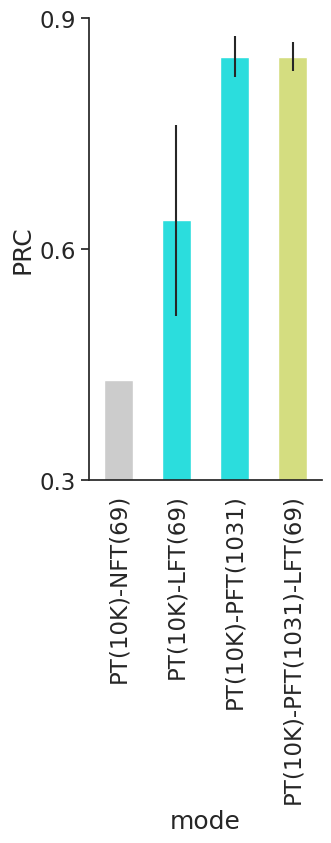

In [20]:
metric = 'PRC'

mean = df.groupby('mode')[metric].mean()
std = df.groupby('mode')[metric].std()

mean = mean.loc[order]
std = std.loc[order]

ot = '#cccccc'
color_dict = {'PT(10K)-NFT(69)':ot, 'PT(10K)-LFT(69)':c[0], 'PT(10K)-PFT(1031)':c[0], 'PT(10K)-PFT(1031)-LFT(69)':c[1]}
colors = pd.Series(color_dict).loc[order].tolist()


fig, ax = plt.subplots(figsize=(3,6))
mean.plot(kind = 'bar', legend=False, ax=ax, yerr = std, color = colors) 

ax.set_ylim(0.3, 0.9)
ax.set_yticks([0.3, 0.6, 0.9])
ax.xaxis.set_label_position('bottom')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(metric)

Text(0, 0.5, 'MCC')

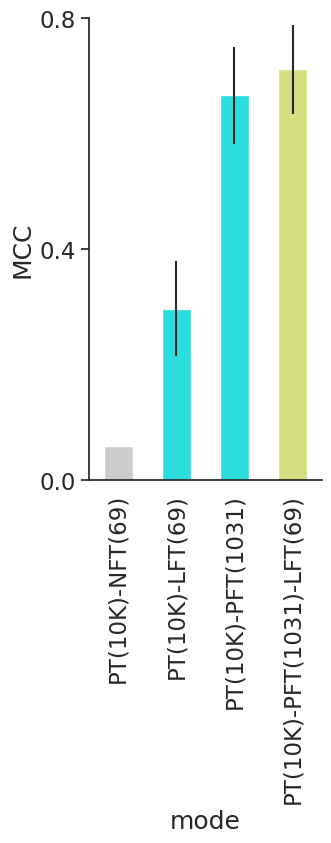

In [21]:
metric = 'MCC'

mean = df.groupby('mode')[metric].mean()
std = df.groupby('mode')[metric].std()

mean = mean.loc[order]
std = std.loc[order]

ot = '#cccccc'
color_dict = {'PT(10K)-NFT(69)':ot, 'PT(10K)-LFT(69)':c[0], 'PT(10K)-PFT(1031)':c[0], 'PT(10K)-PFT(1031)-LFT(69)':c[1]}
colors = pd.Series(color_dict).loc[order].tolist()


fig, ax = plt.subplots(figsize=(3,6))
mean.plot(kind = 'bar', legend=False, ax=ax, yerr = std, color = colors) 

ax.set_ylim(0.0, 0.8)
ax.set_yticks([0.0, 0.4, 0.8])
ax.xaxis.set_label_position('bottom')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(metric)

Text(0, 0.5, 'F1')

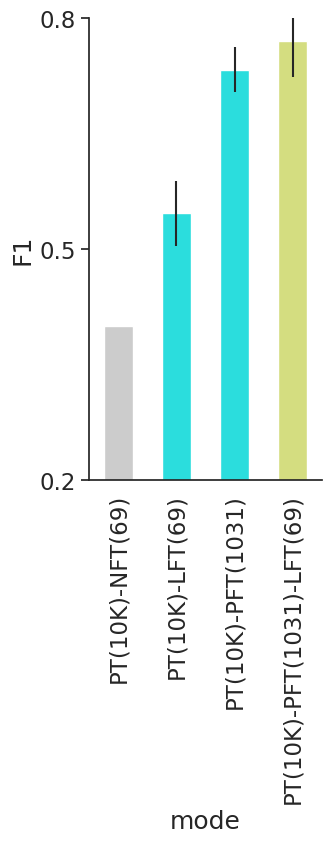

In [22]:
metric = 'F1'

mean = df.groupby('mode')[metric].mean()
std = df.groupby('mode')[metric].std()

mean = mean.loc[order]
std = std.loc[order]

ot = '#cccccc'
color_dict = {'PT(10K)-NFT(69)':ot, 'PT(10K)-LFT(69)':c[0], 'PT(10K)-PFT(1031)':c[0], 'PT(10K)-PFT(1031)-LFT(69)':c[1]}
colors = pd.Series(color_dict).loc[order].tolist()


fig, ax = plt.subplots(figsize=(3,6))
mean.plot(kind = 'bar', legend=False, ax=ax, yerr = std, color = colors) 

ax.set_ylim(0.2, 0.8)
ax.set_yticks([0.2, 0.5, 0.8])
ax.xaxis.set_label_position('bottom')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='y', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_ylabel(metric)